<a href="https://colab.research.google.com/github/carvalheiracarlos/deep_leaning_notebooks/blob/main/alzheimer_cnn/datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import img_to_array, array_to_img 
from matplotlib import pyplot as plt
from keras.utils import np_utils
from imutils import paths
import cv2
import numpy as np
import os
import tensorflow as tf

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset

 94% 357M/380M [00:03<00:00, 98.7MB/s]
100% 380M/380M [00:03<00:00, 119MB/s] 


In [5]:
!mkdir images
!unzip augmented-alzheimer-mri-dataset.zip -d images

Streaming output truncated to the last 5000 lines.
  inflating: images/OriginalDataset/NonDemented/31 (10).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (100).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (11).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (12).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (13).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (14).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (15).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (16).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (17).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (18).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (19).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (2).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (20).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (21).jpg  
  inflating: images/OriginalDataset/NonDemented/31 (22).jpg  
  inflating: images

In [9]:
root_path = 'images/AugmentedAlzheimerDataset'

images = []
image_paths = []
labels = []

all_images_paths = list(paths.list_images(root_path))
current = 'MildDemented'

try:
    for image_path in all_images_paths:
      image_paths.append(image_path)

      image = cv2.imread(image_path)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      image = np.array(img_to_array(image), dtype='float32')
      images.append(image)
      
      label = image_path.split(os.path.sep)[-2]
      labels.append(label)
      if current != label:
            print('Loading Files into arrays...')
            print('Loading Class [{}]'.format(label))
            current = label
      
      current = label

except IOError:
    print('Something went Wrong loading the files')

Loading Files into arrays...
Loading Class [ModerateDemented]
Loading Files into arrays...
Loading Class [VeryMildDemented]
Loading Files into arrays...
Loading Class [MildDemented]
Loading Files into arrays...
Loading Class [NonDemented]


In [11]:
print(f'Total FilePaths...........: {len(image_paths)}')
print(f'Total ImageFiles..........: {len(images)}')
print(f'Total Labels..............: {len(labels)}')
print(f'Are Classes Names on Paths, same as Labels ? {labels == [f.split(os.path.sep)[-2] for f in image_paths]}')

Total FilePaths...........: 33984
Total ImageFiles..........: 33984
Total Labels..............: 33984
Are Classes Names on Paths, same as Labels ? True


Text(0.5, 1.0, 'images/AugmentedAlzheimerDataset/ModerateDemented/66e9cfdb-b2c7-4d3d-a0a0-acebc18202aa.jpg')

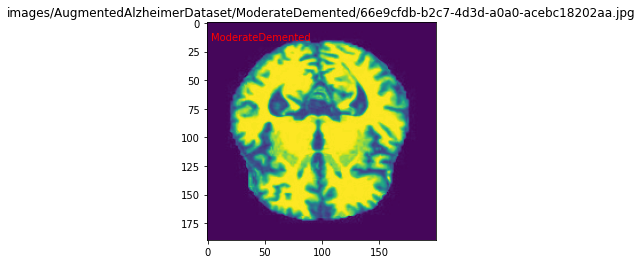

In [13]:
plt.imshow(array_to_img(images[0]))
plt.annotate(labels[0], (3., 15.), color='red', fontproperties='bold')
plt.title(image_paths[0])

In [14]:
images[2].shape

(190, 200, 1)

In [11]:
encoder = LabelBinarizer()
y = encoder.fit_transform(data[2])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data[1], y, test_size=0.3, train_size=0.7, shuffle=True)

In [13]:
try:
    np.save('X_train', X_train)
    np.save('X_test', X_test)
    np.save('y_train', y_train)
    np.save('y_test', y_test)
except IOError:
    print('Error while saving the files')

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
